Mean of Paleomagnetic Dipole
=====

Compute the finite-time average of the axial dipole field using the PADM2M and SINT2000 models. Extract the standard deviation of average as a function of the chosen time interval or window. Compare with theoretical prediction.

In [3]:
using Plots
using Distributions
using Statistics
using DelimitedFiles

Read PADM2M

In [5]:
data1 = readdlm("padm2m.txt")
kyr = 1000.0;
td1 = data1[:,1] * kyr;   #  time in kyr
xd1 = data1[:,2];    # axial dipole moment
ndata1 = length(td1);
println("Number of data = ",ndata1,"  Time resolution = ",td1[2]-td1[1]," kyr")

Number of data = 2001  Time resolution = 1.0 kyr


Reverse time

In [7]:
tpadm = -reverse(td1);
xpadm = reverse(xd1);
dt1 = tpadm[2]-tpadm[1];
println("PADM2M  mean = ",mean(xpadm),"  standard deviation = ",std(xpadm))
#plot(tpadm,xpadm,title="PADM2M",legend=nothing)

PADM2M  mean = 5.321661604197901  standard deviation = 1.4806343768593837


Mean and Standard Deviation over Matuyama and Brunhes Chron

In [9]:
println("M: ",mean(xpadm[1:1220])," ",std(xpadm[1:1220]),"  B: ",mean(xpadm[1221:2000])," ",std(xpadm[1221:2000]))

M: 4.778131090163934 1.36226884281158  B: 6.168933692307691 1.2395970509247418


Read SINT-2000

In [11]:
data2 = readdlm("sint2000.txt")
kyr = 1000.0;
td2 = data2[:,1] * kyr;   #  time in kyr
xd2 = data2[:,2];    # axial dipole moment
ndata2 = length(xd2);
println("Number of data = ",ndata2,"  Time resolution = ",td2[2]-td2[1]," kyr")

Number of data = 2001  Time resolution = 1.0 kyr


SINT-2000  mean = 6.247089911044477  standard deviation = 1.9737572321504624


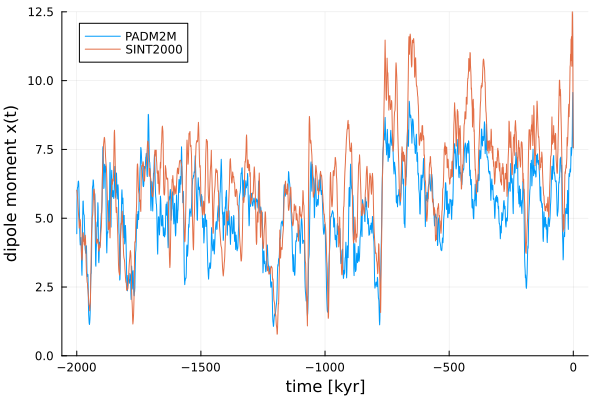

In [12]:
tsint = -reverse(td2)
xsint = reverse(xd2)
dt2 = tsint[2]-tsint[1];
println("SINT-2000  mean = ",mean(xsint),"  standard deviation = ",std(xsint))
plot(tpadm,xpadm,label="PADM2M",xlabel="time [kyr]",ylabel="dipole moment x(t)",ylim=(0,12.5))
plot!(tsint,xsint,label="SINT2000")

In [13]:
println(" M: ",mean(xsint[1:1220])," ",std(xsint[1:1220])," B: ",mean(xsint[1221:2000])," ",std(xsint[1221:2000]))

 M: 5.376484550819672 1.5802768159909486 B: 7.60712712820513 1.7472046038924174


Function to compute average over finite interval 

In [15]:
function averages(nintvl,td,xd)
    
    nsample = Int(floor(length(xd)/nintvl));
    a = zeros(nsample)

    for i = 1 : nsample
        istart = 1 + (i-1) * nintvl;
        a[i] = mean(xd[istart:istart+nintvl-1])
    end

    return a
end

averages (generic function with 1 method)

Function to accumulate averages as a function of window length

In [17]:
function means(nwindow,td,xd)
    
    # allocate memory for standard deviation sd and maximum trend sm
    sd = zeros(nwindow)
    sm = zeros(nwindow)
    window = zeros(nwindow)
    
    Δt = td[2]-td[1];
    
    # loop over window sizes
    for i = 1 : nwindow
        
        window[i] = i * 2.0 * Δt;
        a = averages(i*2,td,xd);
        sd[i] = std(a)
    end

    return window, sd
        
end

means (generic function with 1 method)

Function to evaluate theoretical standard deviation of time average

In [19]:
function theory(γ,window,D2)
    
    n = length(window)
    sigma = zeros(n);
    σx = sqrt(D2/γ)
    w = γ * window;
    
    for i = 1 : n
        
        fw1 = w[i]^(-1) - w[i]^(-2);
        fw2 = exp(-w[i]) * (1*w[i]^(-2));
        sigma[i] = σx * sqrt( 2 * (fw1 + fw2));
        
    end
    
    return sigma
end 

theory (generic function with 1 method)

Define parameters for stochastic model

In [21]:
γ = 0.1;      # use M & B (2019) values
D2 = 0.34
xbar = 5.23;
xsigma = sqrt(D2/γ)

1.8439088914585775

Evaluate variance for PADM2M and SINT-2000

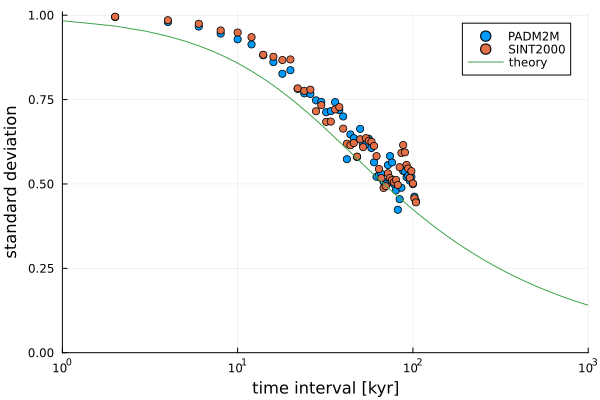

In [23]:
nwindow=52
window1, sd1 = means(nwindow,tpadm[1221:2000],xpadm[1221:2000])
window2, sd2 = means(nwindow,tsint[1221:2000],xsint[1221:2000])

# compare with theory
window3 = (1 : 1 : 1000)
sd3 = theory(γ,window3,D2)

# display results
plot(window1,sd1/std(xpadm[1221:2000]),
    st=:scatter,
    xaxis=:log10,
    ylim=(0,1.01),
    xlim=(1,1000),
    xlabel="time interval [kyr]",
    ylabel="standard deviation",
    label="PADM2M")
plot!(window2,sd2/std(xsint[1221:2000]),st=:scatter,xaxis=:log10,label="SINT2000")
plot!(window3,sd3/xsigma,xaxis=:log10,label="theory")

In [24]:
savefig("PaleoMeans.pdf")

"/Users/brucebuffett/Documents/Julia/FP/PADM2M/PaleoMeans.pdf"